# People Analytics

Desenvolvimento em ferramentas de coleta e análise de dados, para permitir a tomada de decisões baseada em dados de todas as dimensões. Como consequência a People (RH) Analytiucs é um campoi em crescimento e agora é o momento certo para entrar nesse setor.

#### O que é o People Analytics
 - É o estudo de uma base de dados, para encontrar métodos de lidar com pessoas no ambiente de trabalho;
 
#### Problemas resolvidos pelo PA
 - Contratação / Retenção de funcionários
 - Avaliação de desempenho
 - Avaliação de performance
 - Colaboração / Composição de equipe
 - Aprendizado e desenvovimento
 

## Rotatividade de Funcionários (Employee Turnover)

 - Processo de Empregados saindo da empresa;
 - Desligamento de funcionário, Employee Churn;
 - Pode ter variados custos para uma empresa
 - Pode afetar na decição de novas contratações ou retenção de funcionários
 



### Tratando DataFrames de PA

Primeiro temos que descobrir os tipos de variáveis que estamos lidando, teremos qualitativas e quantitativas. Dentro das qualitativas é importante lembrar que teremos as ordinais (podemos colocar em ranking) e as nominais (não tem ordem intrínseca).

###### Podemos encontrar dados como:
 - Satisfação
 - Avaliação
 - Número de Projetos
 - Média de horas mensais trabalhadas
 - Tempo dentro da empresa
 - Acidentes de trabalho
 - Desligamentos
 - Promoções
 - Departamento
 - Salário

In [1]:
# Importando biblioteca
import pandas as pd

In [3]:
data = pd.read_csv("turnover.csv")
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Observando os types dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Observando os dados em si de uma coluna
print(data.salary.unique())

print(data.department.unique())

['low' 'medium' 'high']
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


##### Transformando variáveis qualitativas em números

Temos dois tipos de qualitativas:
- Ordinal -> Que pode ser rankeada

ex: Remuneração - baixa, média, alta

- Nominal -> Que não tem uma ordem intríseca

ex: Departamentos - Vendas, Suporte, RH, TI, Marketing


In [6]:
# Para ordinal, basta converter para um type category
data.salary = data.salary.astype('category')

# Fornecer a ordem certa da categoria
data.salary = data.salary.cat.reorder_categories(['low','medium','high'])

# Colocar um código nas categarias 0 -> n com .cat.codes
data.salary = data.salary.cat.codes

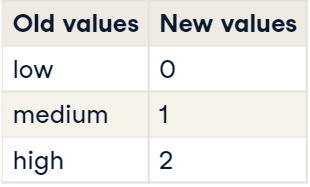

In [7]:
# Podemos observar a diferença na coluna salary
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [8]:
# Para variáveis qualitativas nominal usamos o Getting Dummies

departments = pd.get_dummies(data.department)

departments.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [9]:
# Cuidado com a "dummy trap" 

departments = departments.drop("IT", axis=1)

In [10]:
# Removemos a coluna departments do DF data

data = data.drop("department", axis=1)

In [11]:
# Fazemos um join entre data e departments

data_div = data.join(departments)

data_div.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


##### Estatistica Descritiva


In [12]:
# Turnover Rate

# Pegamos o número total de funcionários
n_employees = len(data)

# Número de empregados que ficaram/saíram
print(data.churn.value_counts())

# Porcentagens 
print(data.churn.value_counts()/n_employees * 100) 

0    11428
1     3571
Name: churn, dtype: int64
0    76.191746
1    23.808254
Name: churn, dtype: float64


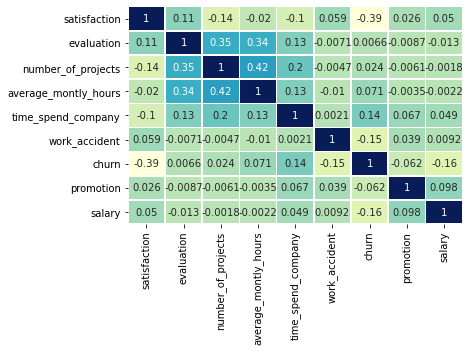

In [13]:
# Encontrar correlações entre variáveis

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Matrix de correlação
corr_matrix = data.corr()

# Heatmap seaborn
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap="YlGnBu", cbar=False)

plt.show()


### Predicting employee turnover

##### Target and features

target = churn / features = else

###### Vamos dividir nossos dados em train e test 
 - train - develop the model
 - test - validade model
 

In [14]:
target = data.churn
features = data.drop("churn", axis=1)

from sklearn.model_selection import train_test_split

# Dados em Rh não são tão grandes, por isso 0.25 de test_size

target_train, target_test, features_train, features_test = train_test_split(target, features, test_size = 0.25)

###### Decision Tree Classification

Temos muitos algoritimos usados em ML, usaremos aqui a Arvoré de Decisão, mais popular em RH
 
 
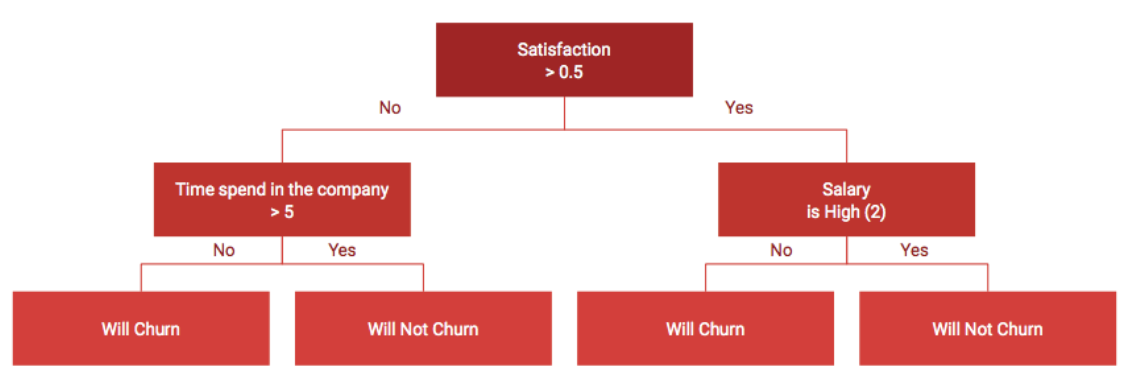

Para fazer essa divisão 2 regras matemáica são bastante utilizadas:
 - Gini:   $ 2*p*(1-p) $
 - Entropy:    $ -p * log(p) - (1-p) * log(1-p) $
 
Como não existe dominancia em nenhuma das regras podemos usar qualquer uma. Ex.:

Total set: 100 observações, 40 sairam, 60 ficaram:
 - Gini: $ 2* 0,4 * 0,6 = 0,48 $
 
Regra de divisão: Satisfação > 0.8

In [26]:
# Usaremos do Sklearn
from sklearn.tree import DecisionTreeClassifier as dtc

model = dtc(random_state=42) #random state garante que vai ter o mesmo resultado outras vezes

# Dando fit no train 
model.fit(features_train, target_train)

#Ver quão bem está a previsão 
print(model.score(features_test, target_test) * 100) 
print(model.score(features_train, target_train) * 100)

97.81333333333333
100.0


###### Visualização da Arvore de decisão

3 Etapa:
 - Export --> Ele será em exportado no diretório
 - Copy Contate
 - Paste in www.webgraphviz.com

In [16]:
# Importando a visualização grafica
from sklearn.tree import export_graphviz 

# Aplicando o Fit
model.fit(features_train,target_train)

# exportando a arvore para um dot file
export_graphviz (model,"tree.dot")

### Evaluating the turnover prediction model

##### Tuning employee tuenover classifier

Evitar o Overfitting: 
 - Limitar a profundidade da arvore, não crescer mais que 5 passos por exemplo (Depht)
 - Limitar a profundidade baseado no tamanho de funcionarios (Sample)
 


In [23]:
# Limitando a profundidade

model_depth_5 = dtc(max_depth = 5, random_state = 42)

model_depth_5.fit(features_train, target_train)

#Ver quão bem está a previsão - Accuracy
print(model_depth_5.score(features_test, target_test) * 100)
print(model_depth_5.score(features_train, target_train) * 100)

97.25333333333333
97.70646279669305


In [24]:
# Limitando por tamanho

model_sample_100 = dtc(min_samples_leaf = 100, random_state = 42)

model_sample_100.fit(features_train, target_train)

#Ver quão bem está a previsão - Accuracy
print(model_sample_100.score(features_test, target_test) * 100)
print(model_sample_100.score(features_train, target_train) * 100)

96.24000000000001
96.52413547870921
